In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
salary: pd.DataFrame = pd.read_csv('https://richardson.byu.edu/220/ds_salary.csv')
salary

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
576,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
577,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
578,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
579,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## General Salary Data
Start by plotting and describing the general shape of the salary data. This initial step sets the foundation for your analysis.

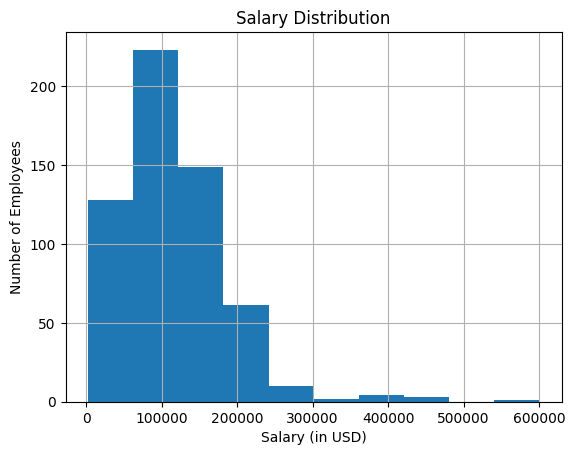

In [4]:
salary['salary_in_usd'].hist()
plt.title('Salary Distribution')
plt.xlabel('Salary (in USD)')
plt.ylabel('Number of Employees')
plt.show()

We plotted the salary against the number of employees in a histogram.
Since we're not comparing the salary to any other variable yet,
a histogram made the most sense.

This gives us a sense that salaries for data scientists are generally right-skewed.

## Effect of Experience on Salary

Investigate how experience influences data scientist salaries. Create visualizations or tables to illustrate any trends or patterns.

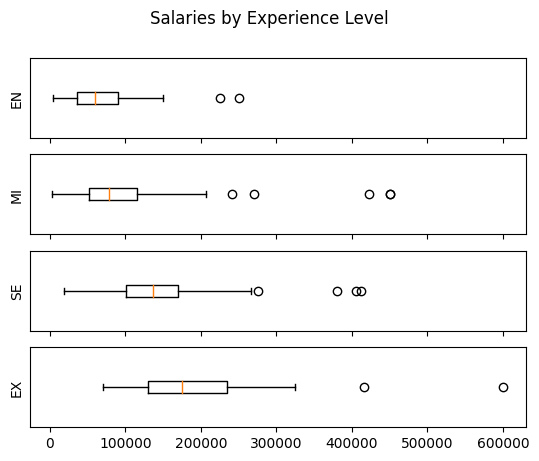

In [5]:
fig, axs = plt.subplots(4,1, sharex=True)
fig.suptitle('Salaries by Experience Level')

for ax, experience in zip(axs, ('EN', 'MI', 'SE', 'EX')):
    ax.boxplot(salary[salary['experience_level'] == experience]['salary_in_usd'], vert=False)
    ax.set_ylabel(experience)
    ax.set_yticks([])

# EN Entry-level
# Junior MI Mid-level
# Intermediate SE Senior-level
# Expert EX Executive-level

These box plots show that there's a positive correlation between salary and experience level.

For all experience levels, all—except the minimum—of the five-number summary increases exponentially.
Also, the highest outlying salary for each experience level is about double the highest salary.

For all experience levels other than expert:
* The minimum salary is about the same
* The inter-quartile range is about the same

For the expert experience level, the inter-quartile range is significantly larger.


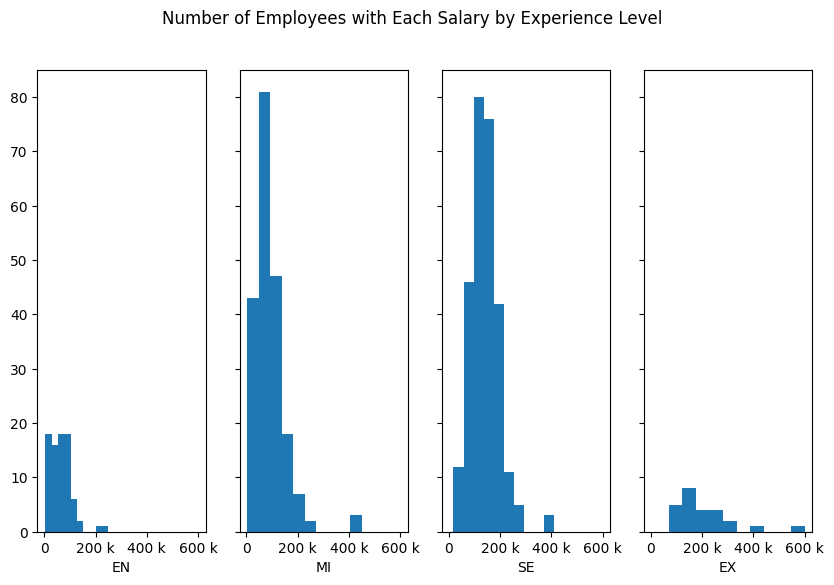

In [6]:
fig, axs = plt.subplots(1,4, sharey=True, sharex=True, figsize=(10,6))
fig.suptitle('Number of Employees with Each Salary by Experience Level')

for ax, experience in zip(axs, ('EN', 'MI', 'SE', 'EX')):
    ax.hist(salary[salary['experience_level'] == experience]['salary_in_usd'])
    ax.set_xlabel(experience)
    ax.xaxis.set_major_formatter(ticker.EngFormatter())

Graphing the data into a series of histograms shows that the salaries are still skewed-right.
Most of the collected data is focused on data scientists with middle or senior experience.
These graphs confirms that the salaries are closely clustered for the vast majority of data scientists with the same level of experience (except for expert level data scientists, which have a larger range and inter-quartile range).

## Impact of Company Size on Salary

Explore how company size affects data scientist salaries. Generate plots or tables to visualize this relationship.

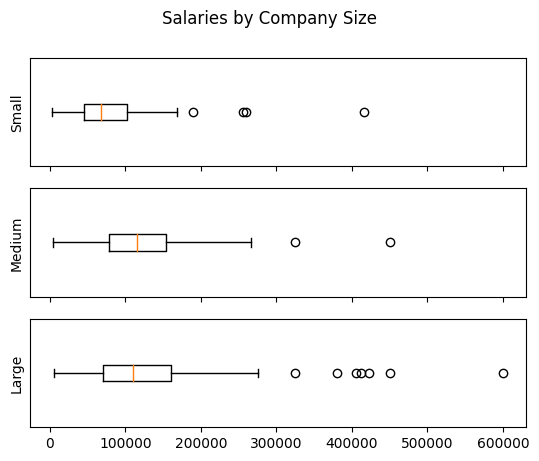

In [7]:
fig, axs = plt.subplots(3,1, sharex=True)
fig.suptitle('Salaries by Company Size')

for ax, company_size, label in zip(axs, ('S', 'M', 'L'), ('Small', 'Medium', 'Large')):
    ax.boxplot(salary[salary['company_size'] == company_size]['salary_in_usd'], vert=False)
    ax.set_ylabel(label)
    ax.set_yticks([])

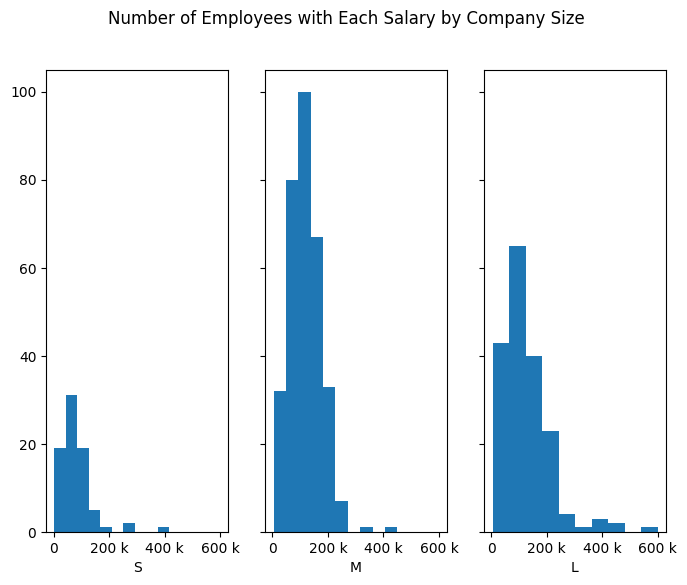

In [8]:
fig, axs = plt.subplots(1,3, sharey=True, sharex=True, figsize=(8,6))
fig.suptitle('Number of Employees with Each Salary by Company Size')

for ax, company_size, label in zip(axs, ('S', 'M', 'L'), ('Small', 'Medium', 'Large')):
    ax.hist(salary[salary['company_size'] == company_size]['salary_in_usd'])
    ax.set_xlabel(company_size)
    ax.xaxis.set_major_formatter(ticker.EngFormatter())

## 4. Job Title Analysis

In [9]:
df = pd.read_csv('https://richardson.byu.edu/220/ds_salary.csv')
df.head()

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
df["job_title"].value_counts()

,count
job_title,
Data Scientist,134
Data Engineer,129
Data Analyst,97
Machine Learning Engineer,39
Research Scientist,16
Data Architect,11
Data Science Manager,10
Machine Learning Scientist,8
Data Analytics Manager,7


In [11]:
analysts = df[df['job_title'].str.contains("Analyst|Analytics")]
analysts = analysts[analysts['job_title'].str.contains("Lead|Manager|Director|Head") == False]
analysts['job_title'].value_counts()

,count
job_title,
Data Analyst,97
BI Data Analyst,5
Business Data Analyst,4
Data Analytics Engineer,4
Analytics Engineer,4
Product Data Analyst,2
Financial Data Analyst,2
Principal Data Analyst,2
Marketing Data Analyst,1


In [12]:
engineers = df[df['job_title'].str.contains("Engineer")]
engineers = engineers[engineers['job_title'].str.contains("Lead|Manager|Director|Head|Principal") == False]
engineers['job_title'].value_counts()

,count
job_title,
Data Engineer,129
Machine Learning Engineer,39
Big Data Engineer,6
Computer Vision Engineer,6
ML Engineer,4
Data Analytics Engineer,4
Analytics Engineer,4
Machine Learning Infrastructure Engineer,3
Computer Vision Software Engineer,3


In [13]:
scientists = df[df['job_title'].str.contains("Scientist|Science")]
scientists = scientists[scientists['job_title'].str.contains("Lead|Manager|Director|Head|Engineer") == False]
scientists['job_title'].value_counts()

,count
job_title,
Data Scientist,134
Research Scientist,16
Machine Learning Scientist,8
Data Science Consultant,7
Principal Data Scientist,7
AI Scientist,6
Applied Data Scientist,5
Applied Machine Learning Scientist,4
Staff Data Scientist,1


In [14]:
leaders = df[df['job_title'].str.contains("Lead|Manager|Director|Head|Principal")]
leaders['job_title'].value_counts()

,count
job_title,
Data Science Manager,10
Director of Data Science,7
Principal Data Scientist,7
Data Analytics Manager,7
Lead Data Engineer,6
Data Engineering Manager,5
Head of Data,5
Head of Data Science,4
Principal Data Engineer,3


<BarContainer object of 65 artists>

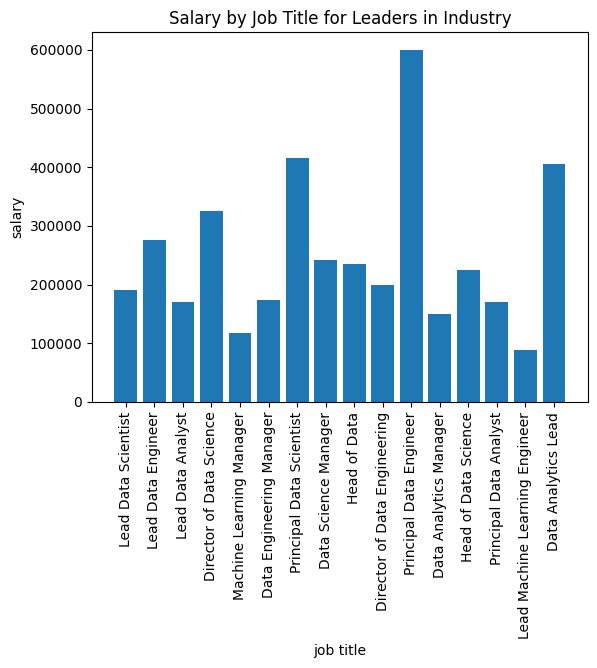

In [15]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Leaders in Industry')
plt.bar(leaders['job_title'], leaders['salary_in_usd'])

<BarContainer object of 204 artists>

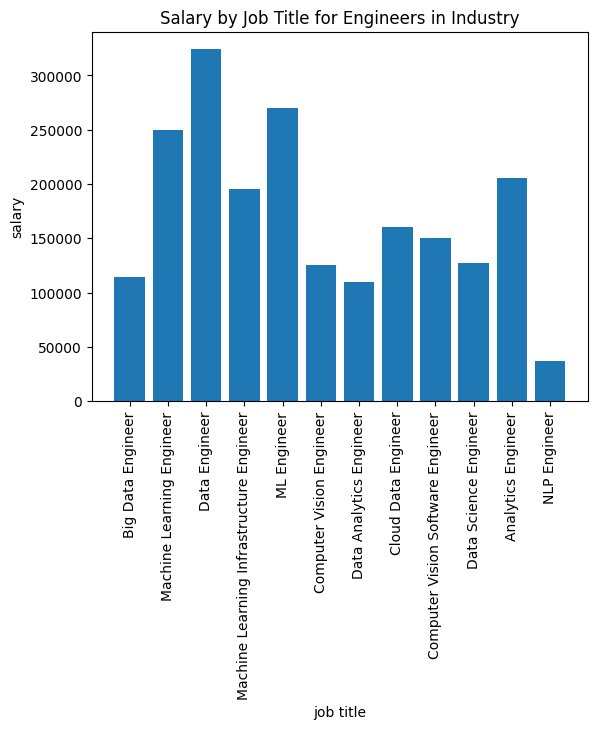

In [16]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Engineers in Industry')
plt.bar(engineers['job_title'], engineers['salary_in_usd'])

<BarContainer object of 122 artists>

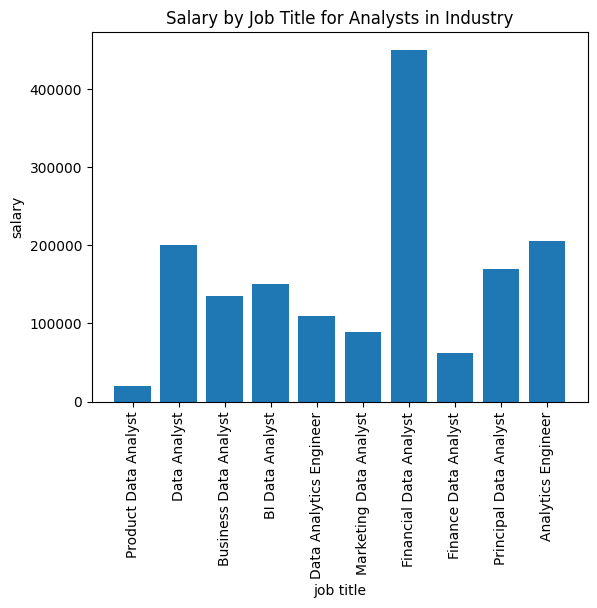

In [17]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Analysts in Industry')
plt.bar(analysts['job_title'], analysts['salary_in_usd'])

<BarContainer object of 188 artists>

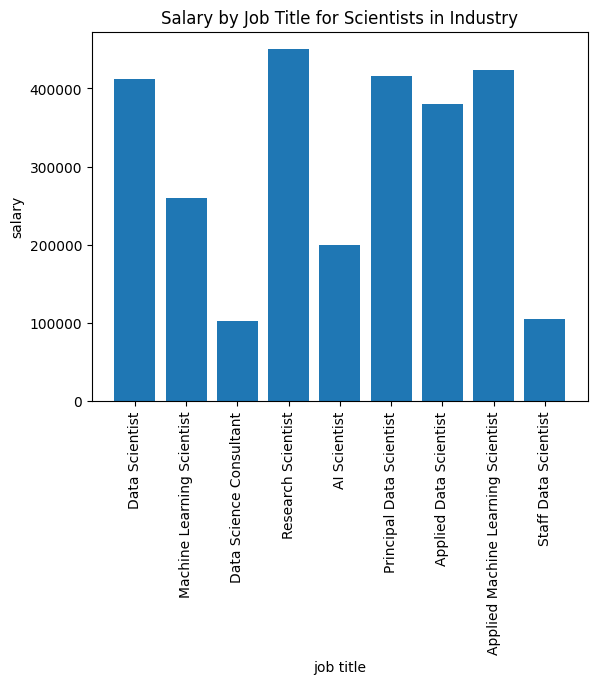

In [18]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Scientists in Industry')
plt.bar(scientists['job_title'], scientists['salary_in_usd'])

In [19]:
# add job category column with condensed job title information

df['job_category'] = 'Other'
df.loc[analysts.index, 'job_category'] = 'Analyst'
df.loc[engineers.index, 'job_category'] = 'Engineer'
df.loc[scientists.index, 'job_category'] = 'Scientist'
df.loc[leaders.index, 'job_category'] = 'Leader'
df[['job_title', 'job_category']].head()

,job_title,job_category
0,Data Scientist,Scientist
1,Machine Learning Scientist,Scientist
2,Big Data Engineer,Engineer
3,Product Data Analyst,Analyst
4,Machine Learning Engineer,Engineer


<BarContainer object of 581 artists>

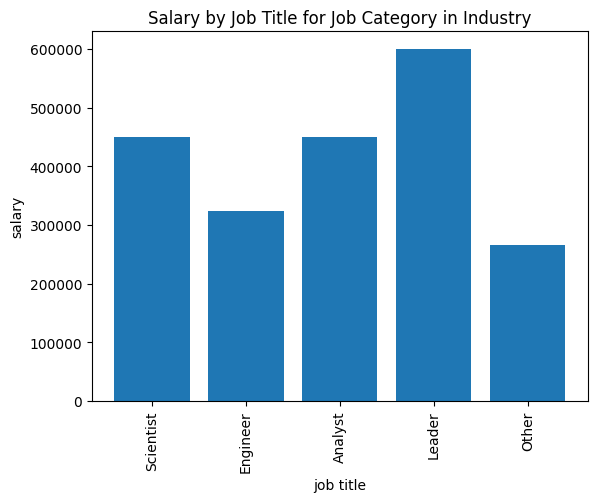

In [20]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Job Category in Industry')
plt.bar(df['job_category'], df['salary_in_usd'])

## 5. Interactions Between Relationships

In [25]:
table = pd.crosstab(df['job_category'], df['company_size'], values=df['salary_in_usd'], aggfunc="mean").round(2)
table

company_size,L,M,S
job_category,,,
Analyst,99336.74,99531.36,42394.91
Engineer,102509.22,117521.23,86426.08
Leader,197442.27,149588.71,141602.18
Other,166250.00,130658.64,100000.00
Scientist,121340.82,125942.47,63956.72


This table shows us that, on average, salaries increase as companies get larger. The only exeption to this is that Scientists seem to have higher average salaries in medium companies vs large companies. Their salaries are halved in small companies though, which is one of the biggest jumps in the table.

In [26]:
table = pd.crosstab(df['job_category'],df['experience_level'], values=df['salary_in_usd'], aggfunc="mean").round(2)
table

experience_level,EN,EX,MI,SE
job_category,,,,
Analyst,57111.88,130000.00,82201.69,110613.79
Engineer,68351.96,215333.33,83729.85,134837.55
Leader,NaN,223560.87,108627.70,165783.28
Other,100000.00,NaN,99159.14,163646.09
Scientist,65742.00,69741.00,99824.55,152020.95



EN Entry-level
Junior MI Mid-level
Intermediate SE Senior-level
Expert EX Executive-level

We see here a similar disrepency in that scientists at the top level actually make less than those just below them. Those at the senior level rather than executive make more as scientists. Otherwise, this table follows a pattern that one would expect.

In [27]:
table = pd.crosstab(df['experience_level'],df['company_size'], values=df['salary_in_usd'], aggfunc="mean").round(2)
table

company_size,L,M,S
experience_level,,,
EN,78276.04,53376.89,64578.96
EX,236232.50,178241.75,201309.33
MI,103851.44,91423.71,50986.27
SE,154427.12,137815.60,116026.73


Here we are comparing company size with experience level, combining some of the variables from the last two tables. As expected, larger companies consistently have higher salaries, as do more senior job roles.